In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-rent-prediction-dataset/Dataset Glossary.txt
/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv
/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


# 1. Introduction

<div style="width:100%;text-align: center;"> <img align=middle src="https://images.unsplash.com/photo-1560005490-8ce6d5357ffa?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8NXx8ZGV0ZWN0aXZlfGVufDB8fDB8fA%3D%3D&auto=format&fit=crop&w=500&q=60" alt="Heat beating" style="height:300px;margin-top:1rem;"> </div>

#### Today, we are going to be the Sherlock Holmes of Machine Learning Models.

#### I'm sure those who are interested in AI and Machine Learning in general are excited and can't wait to jump right into learning how to build models.
#### That is definitely exciting, to see how accurately your model predicts and being at awe by the results and the accuracy.
#### I, too, started off by jumping straight into learning how to build models and building simple models and ending up at learning how Deep Neural Networks work and how to build them. 

#### However, it would hit everyone, at least once, as to how the model exactly derived its conclusions. 
#### I know that understanding the mathematical mechanism behind the model would explain the inner workings of the model.
#### Unfortunately, it does not explain how the individual features contribute to the derived conclusions and how they affect changes in the target variable. 

#### In this notebook, I aim to explain how we can possibly interpret the models that we build. 
#### Unbeknownst to most, this aspect of Machine Learning is extremely crucial in industries such as finance, law, medical and so much more. 

#### Understanding how our model derived its conclusion and being able to explain this to the respective shareholders would be most advantageous and even may ensure fairness and justice.
#### For example, [some resume screening AI when trained on an undiversified dataset, can end up placing people of color lower than others, emphasising racism and prejudice](https://troymedia.com/technology/how-ai-bias-impacts-women-and-people-of-colour-the-most/).
#### To prevent these kind of disasters, we need to know how to understand our model, to observe whether there are any bias or prejudice assumptions made by our model and fix them accordingly. 

#### However as we all know, not all models are built the same and they differ widely on complexity and approach to problems. 
#### Mainly, we can classify the methods for interpretation into two different categories. 
#### First there are the interpretable models which are generally easier to understand and more straightforward than others.
#### On the other hand, there are model agnostic methods meant for all models, and generally used on models which are not as straightforward as the previous ones. 

#### I will be explaining both of them but I encourage you to read further after reading this notebook because this field is an ever-growing field thanks to extensive research and is a very important field you should understand if you wish to utilize Machine Learning for a greater purpose.
#### Without further ado, let us dive into interpretable models!

# 2. Interpretable Models

#### Interpretable models are just like what the word suggests. 
#### They are models that can be very easily interpreted and understood. 

#### One of the most common methods to interpret these models are observing its **weights** and **coefficients** to find out which features are most important; usually the ones with the highest magnitude.
#### Allow me to demonstrate to you with a linear regression model constructed to fit a [housing rent prediction dataset](https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset).

## 2.1 Linear Regression Coefficients

In [2]:
df = pd.read_csv('../input/house-rent-prediction-dataset/House_Rent_Dataset.csv')
df.drop(['Posted On', 'Point of Contact'], axis=1, inplace=True)
display(df)

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1
...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2
4742,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3
4743,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3
4744,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2


#### First, these are the categorical data that we would need to handle for a Linear Regression model.

In [3]:
categorical = df.select_dtypes(include=[object])
display(categorical)

,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred
0,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family
1,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family
2,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family
3,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family
4,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors
...,...,...,...,...,...,...
4741,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family
4742,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family
4743,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family
4744,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family


#### Let us label encode these categorical columns.

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

floor = le.fit_transform(categorical['Floor'])
categorical['Floor'] = floor

areatype = le.fit_transform(categorical['Area Type'])
categorical['Area Type'] = areatype

arealocality = le.fit_transform(categorical['Area Locality'])
categorical['Area Locality'] = arealocality

city = le.fit_transform(categorical['City'])
categorical['City'] = city

furnishingstatus = le.fit_transform(categorical['Furnishing Status'])
categorical['Furnishing Status'] = furnishingstatus

tenantpreferred = le.fit_transform(categorical['Tenant Preferred'])
categorical['Tenant Preferred'] = tenantpreferred

display(categorical)

,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred
0,455,2,221,4,2,1
1,14,2,1527,4,1,1
2,14,2,1760,4,1,1
3,10,2,526,4,2,1
4,10,1,1890,4,2,0
...,...,...,...,...,...,...
4741,271,1,219,3,1,1
4742,16,2,1214,3,1,1
4743,271,1,724,3,1,1
4744,226,1,590,3,1,2


#### The final label encoded dataframe would look like this.

In [5]:
non_categorical = df.select_dtypes(exclude=[object])
fixed = pd.concat([categorical, non_categorical], axis=1)
display(fixed)

,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,BHK,Rent,Size,Bathroom
0,455,2,221,4,2,1,2,10000,1100,2
1,14,2,1527,4,1,1,2,20000,800,1
2,14,2,1760,4,1,1,2,17000,1000,1
3,10,2,526,4,2,1,2,10000,800,1
4,10,1,1890,4,2,0,2,7500,850,1
...,...,...,...,...,...,...,...,...,...,...
4741,271,1,219,3,1,1,2,15000,1000,2
4742,16,2,1214,3,1,1,3,29000,2000,3
4743,271,1,724,3,1,1,3,35000,1750,3
4744,226,1,590,3,1,2,3,45000,1500,2


#### Let's just perform standard scaling as Linear Regression is sensitive to feature scales.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
fixed_scaled = pd.DataFrame(scaler.fit_transform(fixed), columns = fixed.columns)
display(fixed_scaled)

,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,BHK,Rent,Size,Bathroom
0,1.384550,0.968881,-1.375251,0.863449,1.111575,0.145534,-0.100773,-0.320026,0.208960,0.038594
1,-1.324614,0.968881,0.687519,0.863449,-0.349387,0.145534,-0.100773,-0.191982,-0.264125,-1.092067
2,-1.324614,0.968881,1.055532,0.863449,-0.349387,0.145534,-0.100773,-0.230395,0.051265,-1.092067
3,-1.349187,0.968881,-0.893517,0.863449,1.111575,0.145534,-0.100773,-0.320026,-0.264125,-1.092067
4,-1.349187,-1.028647,1.260862,0.863449,1.111575,-1.783809,-0.100773,-0.352037,-0.185277,-1.092067
...,...,...,...,...,...,...,...,...,...,...
4741,0.254196,-1.028647,-1.378410,0.303852,-0.349387,0.145534,-0.100773,-0.256004,0.051265,0.038594
4742,-1.312327,0.968881,0.193149,0.303852,-0.349387,0.145534,1.100907,-0.076743,1.628216,1.169255
4743,0.254196,-1.028647,-0.580784,0.303852,-0.349387,0.145534,1.100907,0.000084,1.233978,1.169255
4744,-0.022249,-1.028647,-0.792432,0.303852,-0.349387,2.074878,1.100907,0.128128,0.839741,0.038594


#### Now I will fit a very simple Linear Regression model to this dataset and observe the coefficients of these features in determining the rent price.

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(fixed_scaled.loc[:, fixed_scaled.columns!='Rent'],fixed_scaled['Rent'])
temp = lr.coef_
coefficients = pd.DataFrame({'Features': list(fixed_scaled.columns[:7]) + list(fixed_scaled.columns[8:]), 'Coefficients': temp})
coefficients = coefficients.sort_values(by='Coefficients', ascending=False)
display(coefficients.style.background_gradient(cmap="Blues"))

,Features,Coefficients
7,Size,0.253799
8,Bathroom,0.220975
3,City,0.170562
0,Floor,0.003168
5,Tenant Preferred,-0.010744
2,Area Locality,-0.011919
6,BHK,-0.019426
4,Furnishing Status,-0.060409
1,Area Type,-0.103889


#### As we can see the size of the houses (square feet) has the highest weight in determining the rent price. 
#### It definitely seems that number of bathroom and size contribute the most, so if one is looking to roughly gauge how expensive the rent of a home might be, one can figure it out by observing the size and number of bathrooms in the house.

#### Linear Regression, as you can see, is a very easily interpretable model. 
#### Now, allow me to demonstrate to you how we can interpret Decision Trees, which is pretty intuitive when trying to interpret it.

## 2.2 Decision Trees

#### I will be using the same dataset and fit a decision tree on it. 

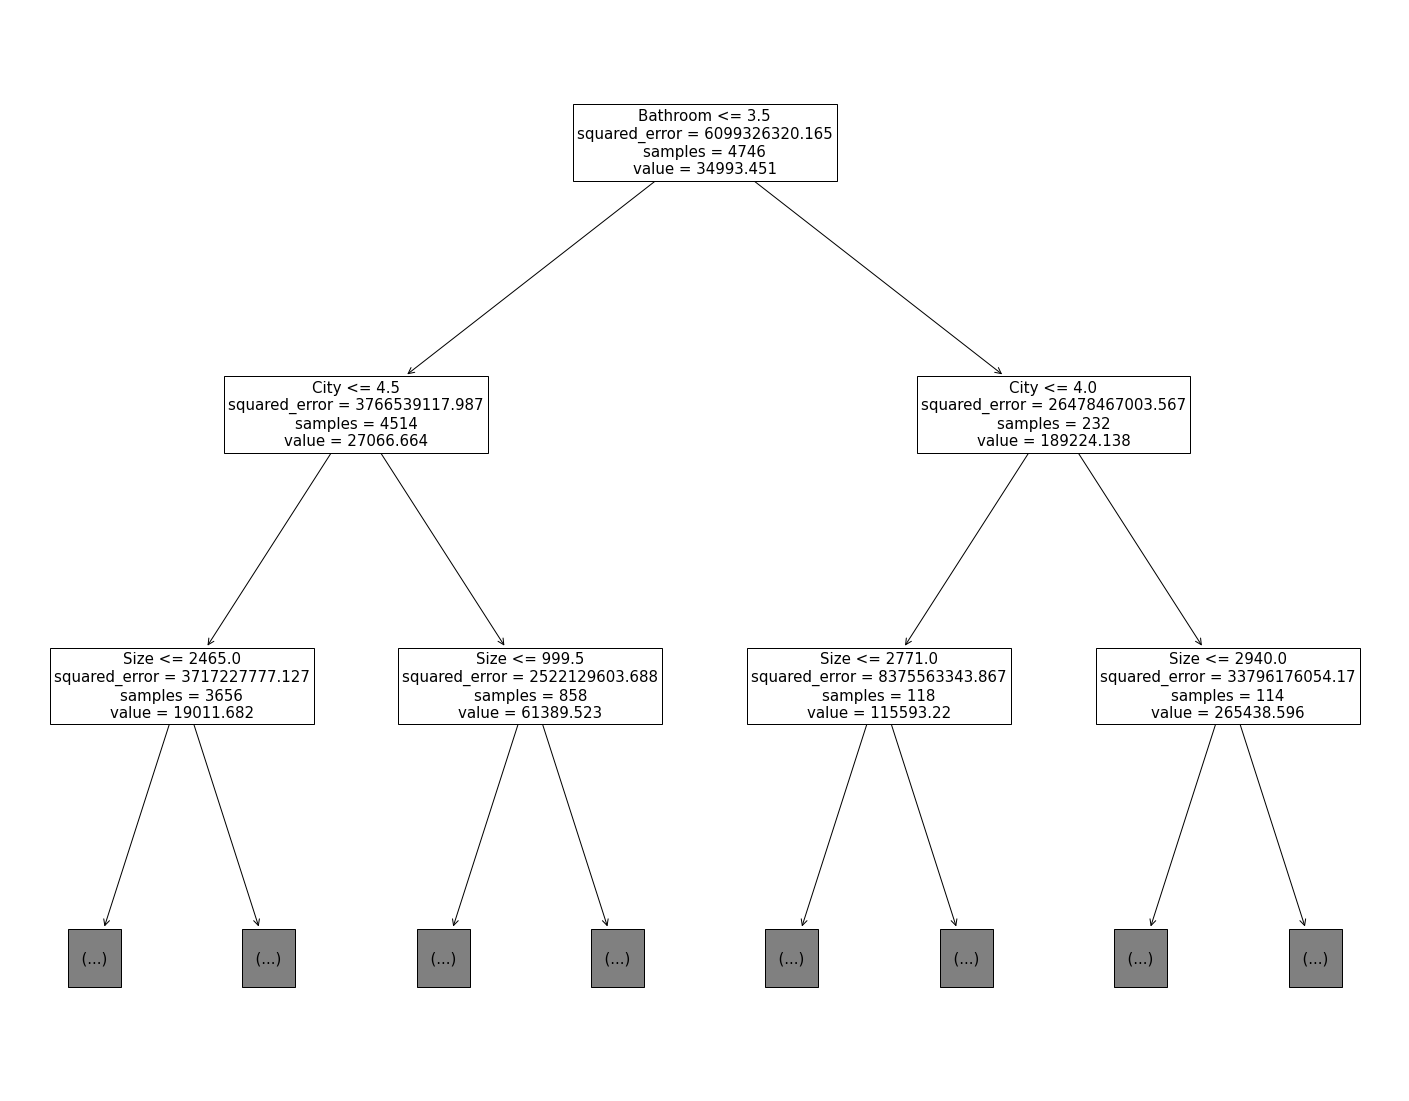

In [8]:
from sklearn import tree
from matplotlib import pyplot as plt
clf = tree.DecisionTreeRegressor()
clf = clf.fit(fixed.loc[:, fixed.columns!='Rent'],fixed['Rent'])
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, max_depth = 2, fontsize=15, feature_names=(list(fixed_scaled.columns[:7]) + list(fixed_scaled.columns[8:])))
plt.show()

#### Now this is a visualization of the first few branches of our Decision Tree model.
#### As you can see, for every node, we split it based on the certain criterias that are written at the top of the nodes.
#### We aim to slowly minimize the squared error, as you can see.
#### This is the case for a Decision Tree Regressor.
#### However for a Decision Tree Classifier, which is the more often used case, we use an element called **gini coefficient**. 
#### I have explained about this concept in my guide [here](https://www.kaggle.com/code/kimmik123/all-about-decision-trees) so do check that out. 
#### But the main idea is to lower the gini coefficient, lowering the impurity at each node till nodes contain all the same class elements. 

#### Therefore, Decision Trees are easy to visualize and understand when the dataset is small and there are not that much features to consider. 
#### We can simply have a test datapoint at hand and follow down the decision tree according to the nodes.
#### However, allow me to show you what the above Decision Tree looks like down the branches.

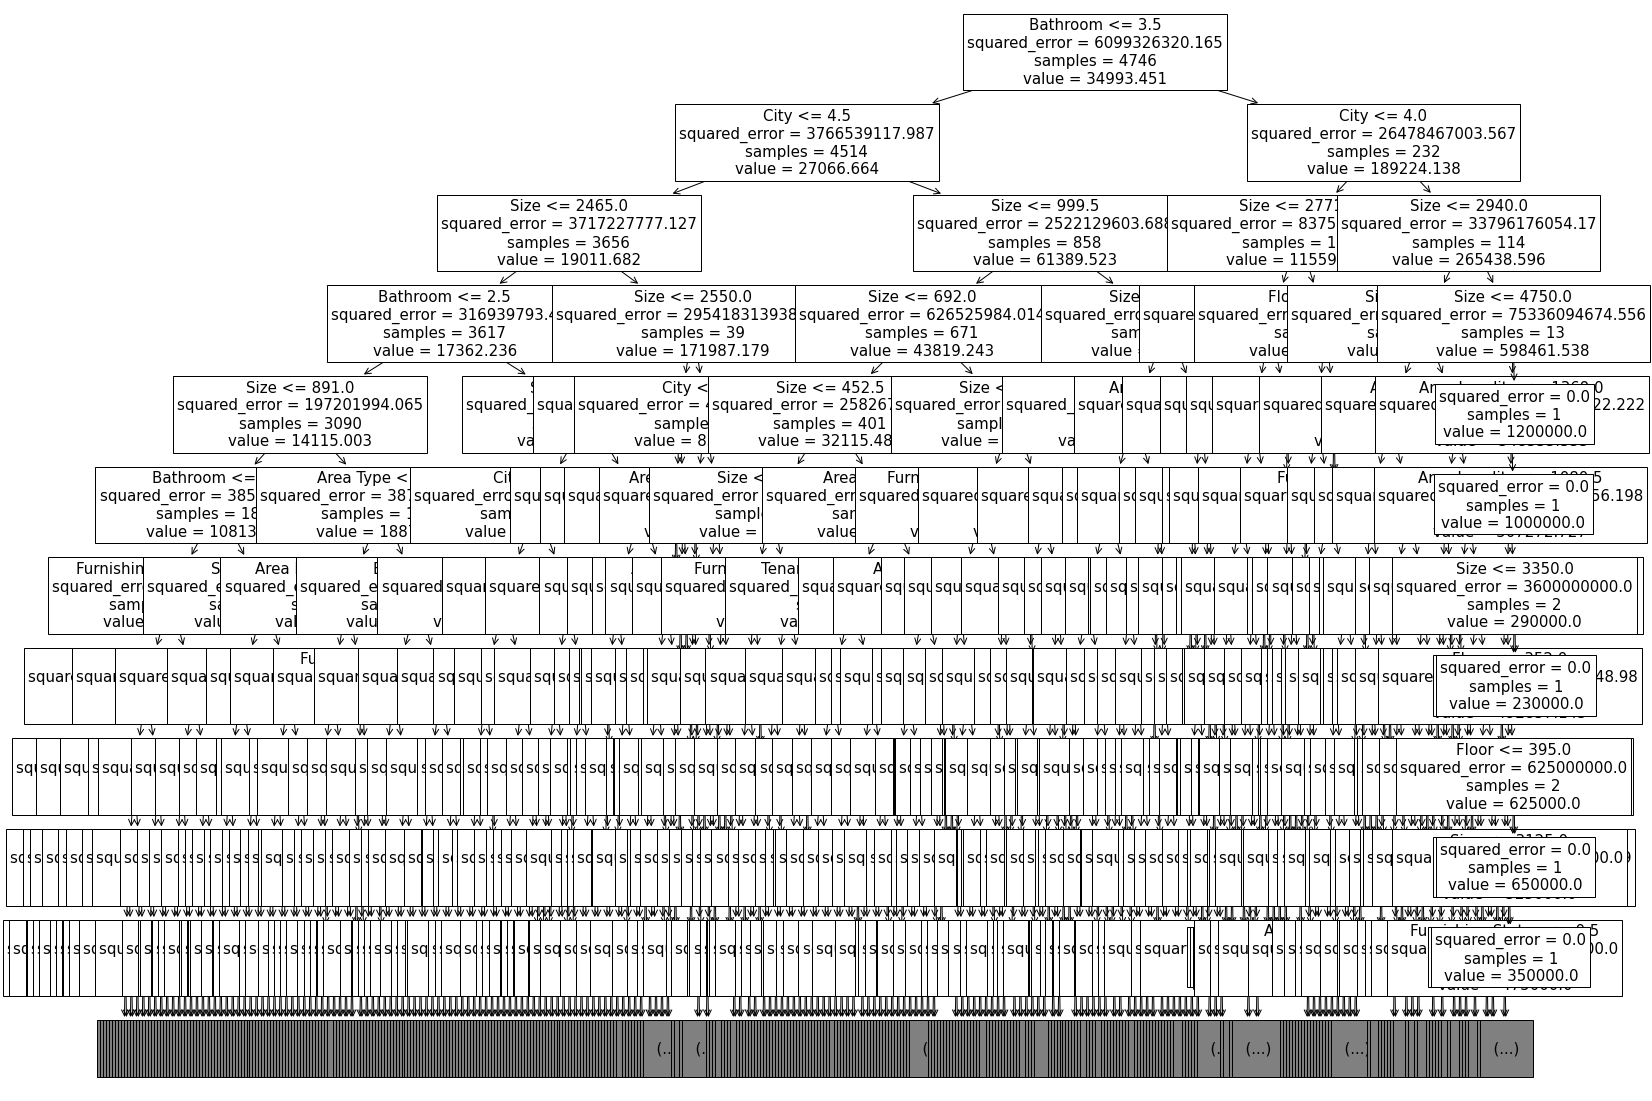

In [9]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, max_depth = 10, fontsize=15, feature_names=(list(fixed_scaled.columns[:7]) + list(fixed_scaled.columns[8:])))
plt.show()

#### I'm thinking the disadvantage of this approach is pretty obvious.
#### It is just too complex and messy!
#### There is no way you can follow a single route all the way down to the last node.

#### Therefore, there is an element known as [feature importances](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_) in a Decision Tree model.
#### This is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.
#### The higher this numerical value, the more important and crucial it is when it comes to making predictions.
#### So in this case, the feature importances would be as such.

In [10]:
featureimportances = pd.DataFrame({'Features': list(fixed_scaled.columns[:7]) + list(fixed_scaled.columns[8:]), 'Coefficients': clf.feature_importances_})
featureimportances = featureimportances.sort_values(by='Coefficients', ascending=False)
display(featureimportances.style.background_gradient(cmap="Blues"))

,Features,Coefficients
7,Size,0.255744
3,City,0.238051
8,Bathroom,0.218396
4,Furnishing Status,0.204287
2,Area Locality,0.042282
0,Floor,0.028733
6,BHK,0.005054
5,Tenant Preferred,0.003998
1,Area Type,0.003455


#### Now for our Decision Tree Regressor, the case is slightly different.
#### The most important features are mainly Size, City, Floor and Bathroom.
#### These four features do make sense when you think about it. 

#### In a nutshell, interpretable models are easily understandable by looking at its weights/coefficients and determining which features contribute the most to the models' predictions.
#### Furthermore, for Decision Tree models, one can easily take a glance at how the specific decisions are made.
#### Now that I have explained the rather simple interpretable models, let us look at Model Agnostic Methods.

# 3. Model Agnostic Methods

#### Now these methods are mostly utilized when complex models are used, such as Deep Neural Networks, SVMs and such. 
#### These models will be used generally on complex and huge datasets.
#### With these complex models, it becomes hard to simply look at the feature importances to determine which features carry the most weight and voice in determining the outcome of a prediction.

#### For example, just think about SVM.
#### It is hard to determine any feature importance, especially if you're using non-linear kernels. 
#### Furthermore, for Neural Networks, there is just too much connections between nodes and even if you somehow manage to unravel them, there are further networks beneath known as hidden layers.
#### Trying to understand these is close to impossible even for experts. 
#### Thus, they are generally referred to as black boxes.

#### To intrepret these models, the first method I will be introducing is called the **Partial Dependence Plots (PDPs)**.

## 3.1 Partial Dependence Plots (PDPs)

#### This first method is going to be rather simpler and easy to understand compared to the next ones I will be talking about. 
#### It is always nice to start easy to warm up your brain 😅.
#### However, it being easy does not mean that the method is extremely effective and you will know why soon.
#### So to start off, let me first explain what PDPs is about.

#### So these plots are meant to help visualize the average partial relationship between the predicted target and one or more features.
#### As I mentioned, this is a visualization method and thus, the features we can look at is limited to, at maximum, 2 features. 
#### All the other values are kept constant so that we can see what effects the feature, that we are curious about, has on the target variable. 
#### For these instances, the predictions are averaged out and displayed.
#### Since this may be all too much to understand through text, allow me to demonstrate to you what it would look like.

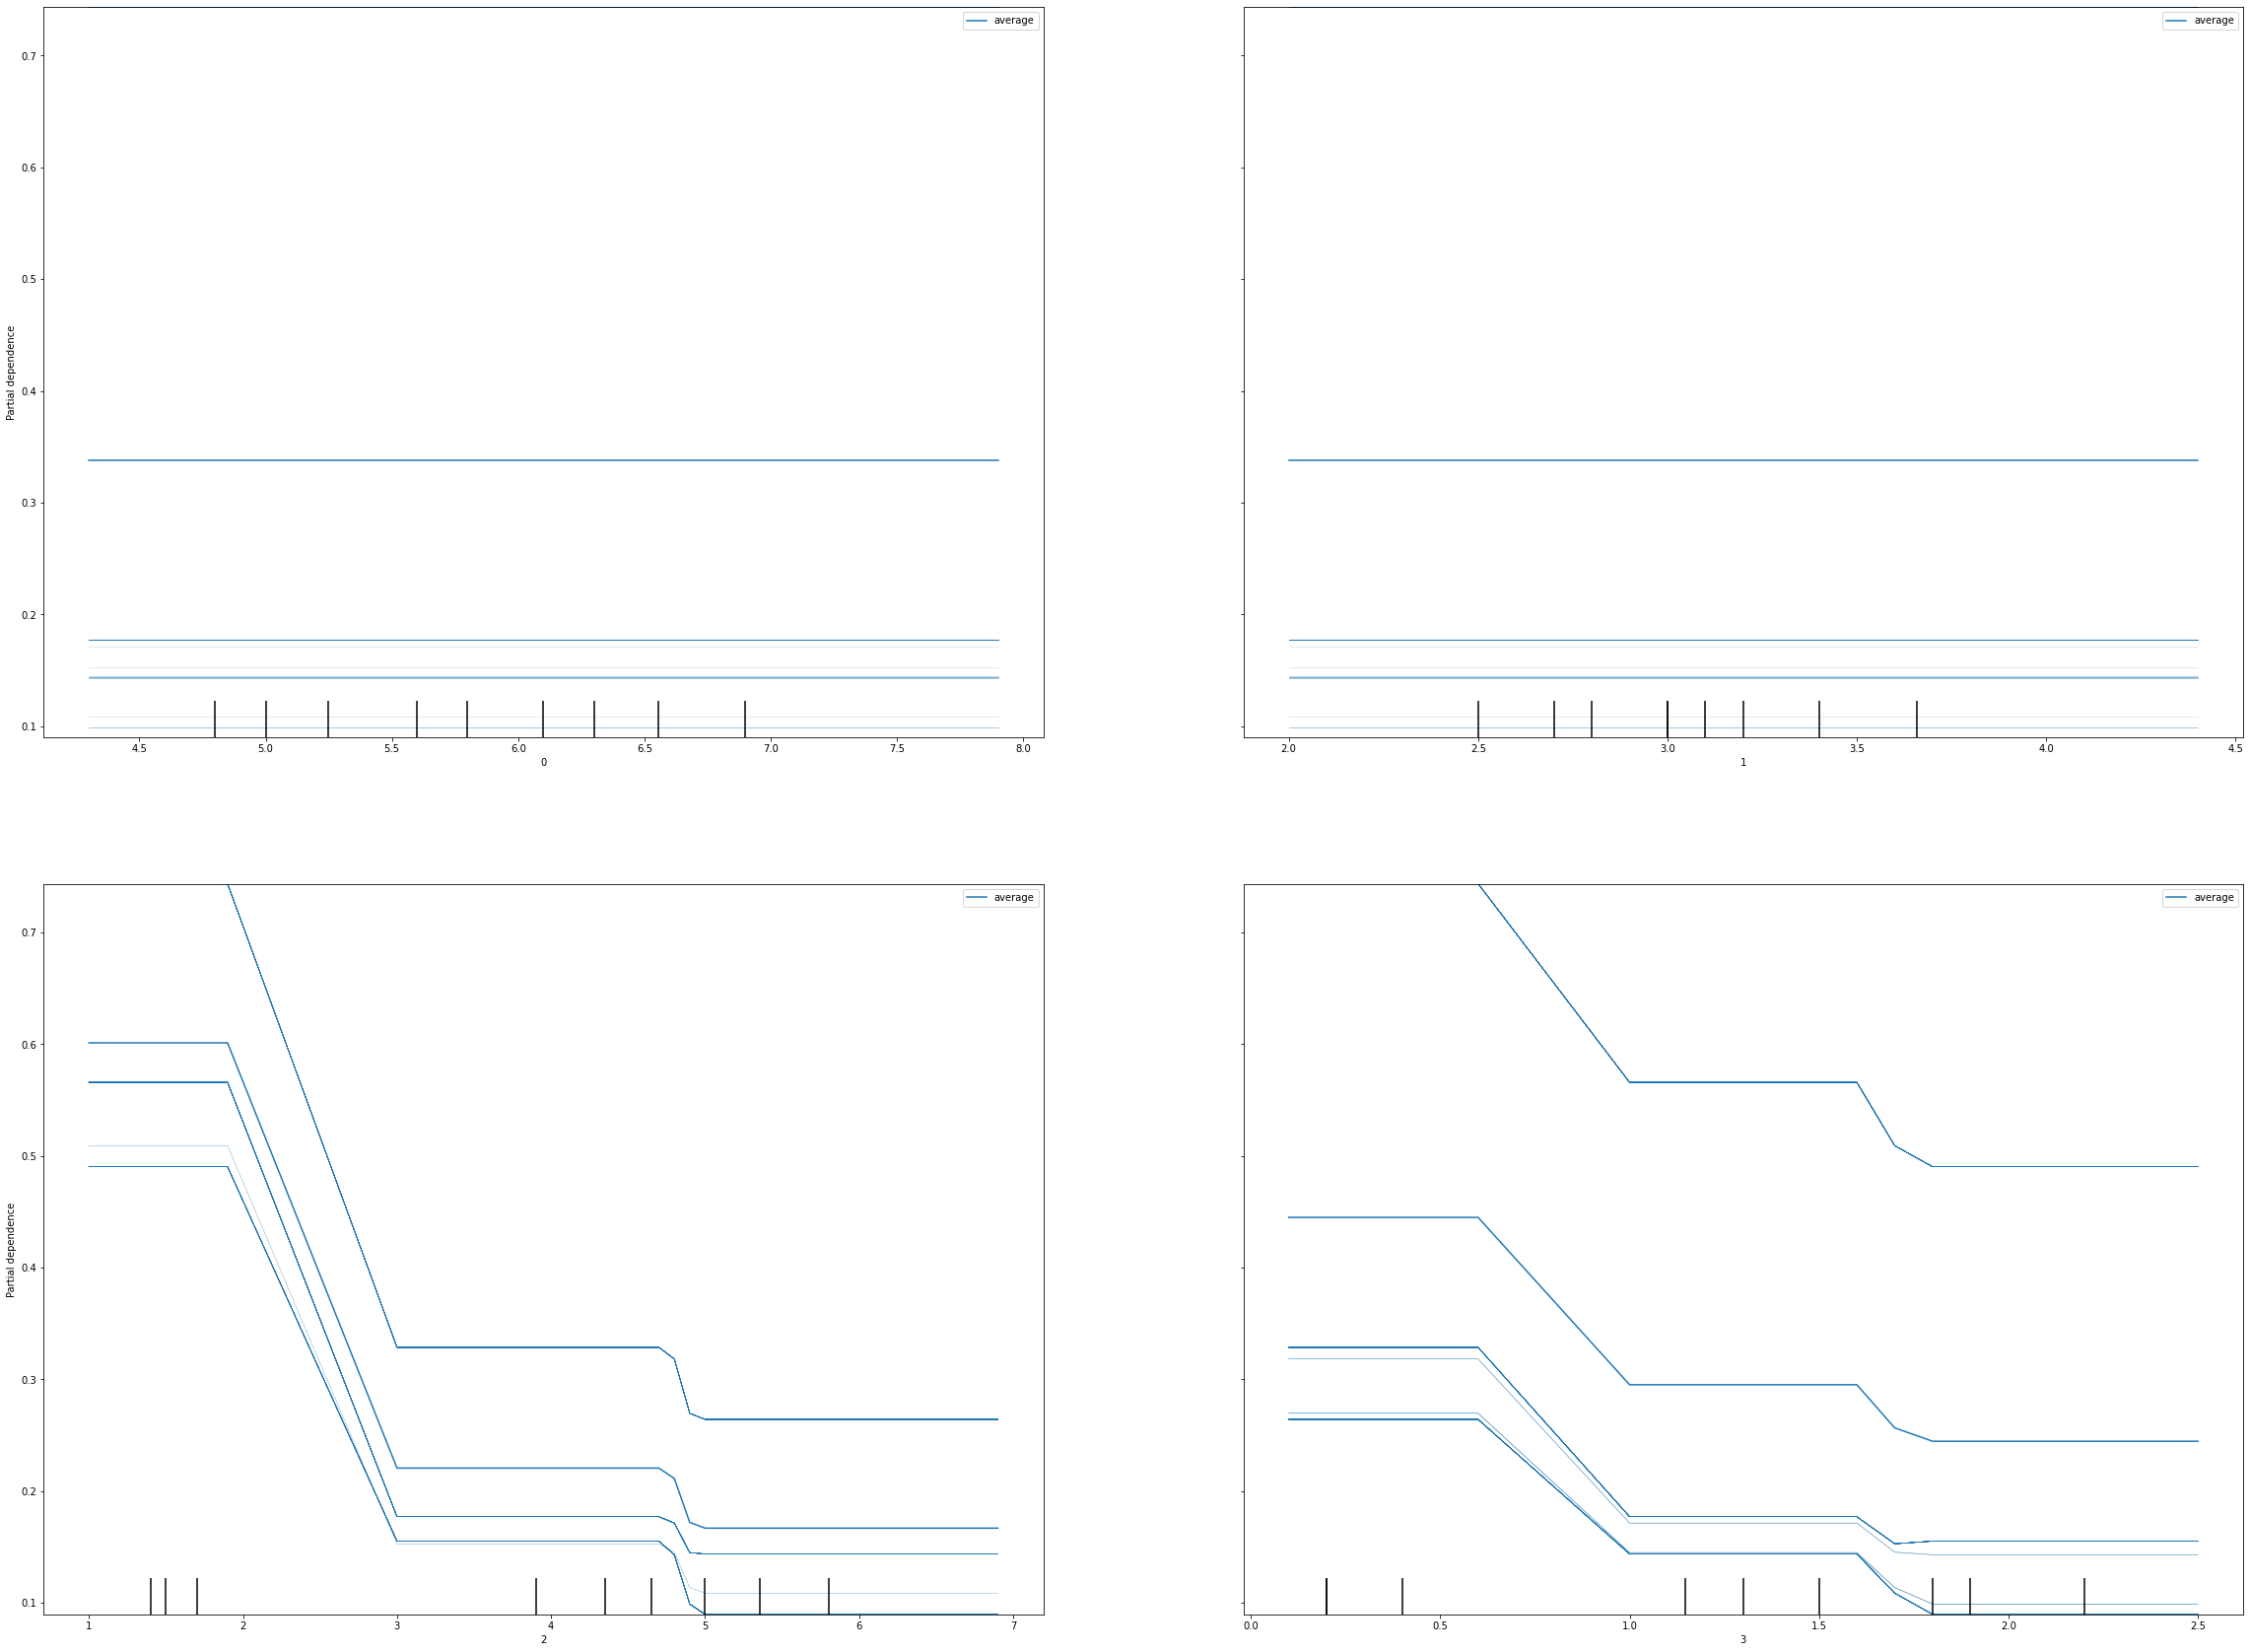

In [11]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris
iris = load_iris()
mc_clf = GradientBoostingClassifier(n_estimators=10,
    max_depth=1).fit(iris.data, iris.target)
features = [0,1,2,3]
fig, ax = plt.subplots(2, 2, figsize=(40, 30))
PartialDependenceDisplay.from_estimator(mc_clf, iris.data, features, target=0, ax=ax, kind='both')

#### For the iris dataset, since this is a multiclass problem, I specified the class that I want my plot to focus on as the first target. 
#### As we can see, there ain't much changes the first two feature variables bring, but for the last two feature variables, there seems to be a decrease in the target being the first class as the values of the respective feature variables become bigger. 
#### We can observe this by the line, denoted as average, decreasing in value while the x-axis (feature variables) becomes larger. 
#### Through these observations, we can very easily conclude such relationships, even for complex datasets and models.

#### Now that I have explained and showed you how it works, let me explain some caveats about this method.
#### For this method, we have to assume that the feature variables are independent. 
#### If you have been reading my guides on machine learning models, you may have heard numerous times about feature variables needing to be independent and how this is a big consideration for users. 
#### It is extremely hard to find independent feature variables in the real world and more difficult to prove that they are so. 
#### Therefore, do keep this in mind always when utilizing this method for model interpretation. 

## 3.2 Local Interpretable Model-agnostic Explanations (LIME)

#### Now this is an unique method that explains the predictions of our Machine Learning model and not much about anything else. 
#### You will soon see why I phrase it this way.

#### The one particular thing about LIME is that a local surrogate model will be trained separately. 
#### Now what is a surrogate?

#### Initially, we have a black box model that is trained on the real dataset, the one we have on our hands. 
#### After the training is complete, the model will then be able perform predictions. 
#### Here is where the surrogate model comes into play. 
#### We will build a surrogate model on the data with the predicted labels (those that are predicted by the trained black box model).
#### By doing so, this surrogate model of ours will be an interpretable one. 

#### I know to those of you reading this for the first time, it may sound absurd and absolutely confusing. 
#### However, once you get it, it is a rather intuitive method.
#### Unfortunately, as some of you might have thought, this surrogate model of ours would lack in predicting power compared to our black box model, since it has to be a more intrepretable model than an extremely accurate one. 
#### Furthermore, we need a metric to determine the accuracy of our surrogate model and come up with a solid limit as to how much we are willing to tolerate that accuracy decreasing. 
#### Now that I have explained it, allow me to show you in code.
#### For the LIME method, I will be utilizing the wine dataset.

In [12]:
wine = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### This wine dataset has these various attributes of wine as the feature variables and the aim is to accurately predict the corresponding quality of that respective wine.

#### For this case, let's dive in abit deeper and perform the train test split inorder to obtain the accuracy at the end.

In [13]:
from sklearn.model_selection import train_test_split

X = wine.drop('quality', axis=1)
y = wine['quality']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### For this dataset, I will be utilizing the Random Forest Classifier to classify the quality of the wines.

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 65.31%


#### Now we'll attempt to interpret this model.

In [15]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=[str(i) for i in range(11)],
    mode='classification'
)

#### I have instantiated the explainer for our LIME method.
#### Using this method, I will have to call the *explain_instance* function to explain a specific row/instance in the dataset.

In [16]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[1], 
    predict_fn=model.predict_proba,
    top_labels = 2
)

exp.show_in_notebook(show_table=True)

#### Personally, I believe this LIME method is very visuailizing and most easy to understand.
#### The **Prediction Probabilities** on the left hand side shows the prediction probabilities of the different classes and apparently the first line of the data has the 2 as its most likely quality. 
#### The tables in the middle showcase the top two likely outcomes (in this case 2 and 3), from the prediction probabilities section, and how the feature values affect those outcomes. 
#### For example, for the case of the quality being 2, it is due to the fact that the 'alcochol' feature variable is smaller or equal to 9.50. 
#### The horizontal bar represents the relative importance of that feature. 
#### The table on the right showcases the values of the respective features and they are color coded to show that which side they are contributing to.
#### For example, the pH values being 3.39 corresponds to the fact that 'NOT 2' is explained by the 3.31 < pH <= 3.40 inequality. 

#### Now that I showed you how we can use this method, let me explain to you a pitfall that you have to be aware and careful of.
#### As I mentioned initially, the surrogate model is going to be a more interpretable model than the black box model, and thus we might end up using a linear model.
#### This could be a potential pitfall as this surrogate model might have a hard time explaining the non-linearity characteristics of a more complex model it is built based on. 
#### However, putting that aside, I would say this method is splendid at local interpretability of a model, which means helping you understand how the model arrived at a specific decision for that specific data points. 
#### This is different from a global interpretability where we understand the model as a whole and not only a specific case of data. 

#### Now for the final method, allow me to introduce you to the Shapely Additive Explanations (SHAP).

## 3.3 Shapley Additive Explanations (SHAP)

#### This model is more visualizing and easier to understand than even LIME, in my personal opinion.
#### It is based on a cooperative game theory and can interpret the model both globally and locally, a jack of all trades!
#### Additionally, we can even utilize this method to investigate even when the features are independent of each other. 
#### However, the one drawback is that the computation speed can take a while when we have numerous feature variables. 
#### Let me jump into the code for this one and illutrate to you what it can show and how we can use it to intrepret our model.

#### For this method, we will be importing the California Housing dataset directly from the sklearn library and train any model, such as a Random Forest Regressor.

In [17]:
import shap
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

dataset = fetch_california_housing(as_frame = True)
X = dataset['data']
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)
print("The accuracy is {:.2f}".format(model.score(X_test, y_test)))

The accuracy is 0.81


#### To compute SHAP values for the model, we need to create an Explainer object, just like the LIME method, and use it to evaluate a sample or the full dataset.
#### Now this is going to take a while; the one drawback of this method.
#### For this instance, it took close to 24 minutes.

In [18]:
explainer = shap.Explainer(model.predict, X_test)

shap_values = explainer(X_test)

Exact explainer: 4129it [27:09,  2.52it/s]


#### Now with this, let us look at how this method can provide global interpretability.

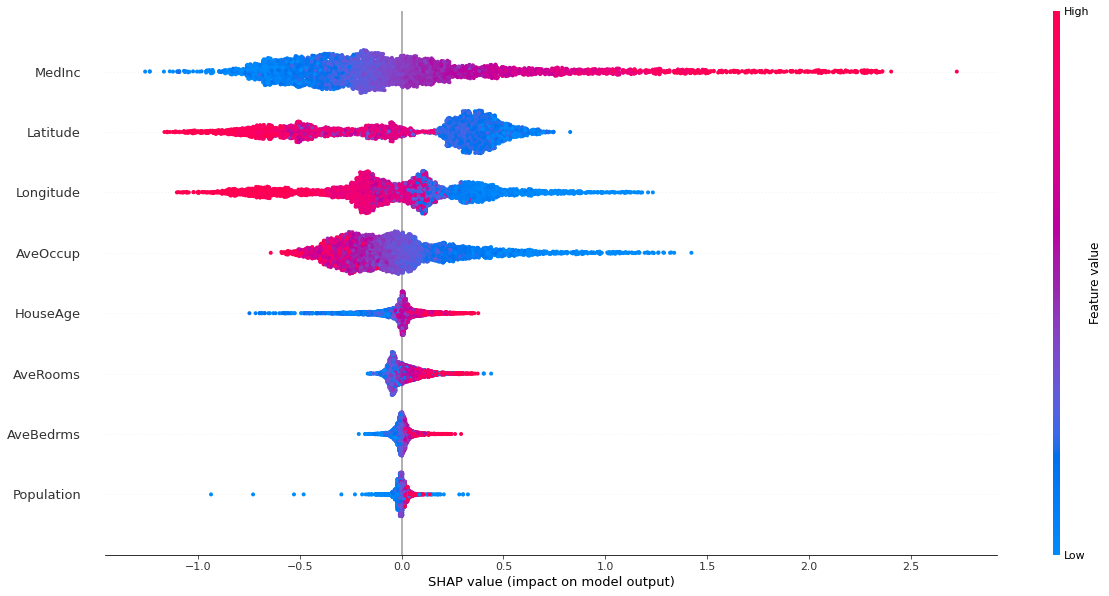

In [19]:
shap.plots.beeswarm(shap_values,plot_size=[20, 10])

#### As we can see, the horizontal axis showcases the impact on the output variable which is the house value.
#### Each feature variables are color coded to show their differing magnitude.
#### For example, for the 'Latitude' feature, the higher the value, the lower the house value. 
#### Furthermore, with this beeswarm plot, we can observe more specific details such as that there are numerous observations for lower latitude values and most of them contribute positively to the house value.
#### On the contrary, the higher the latitude value, the more the house value decreases, compared to how much it can increase.
#### This kind of interpretability (where individual observations are all plotted) is extremely useful when one wishes to observe and explain the intricate details of the feature contributions and their changes to the target variable.

#### Now, let me show you how we can take a look at local interpretability.
#### I will be taking a look at the first observation.

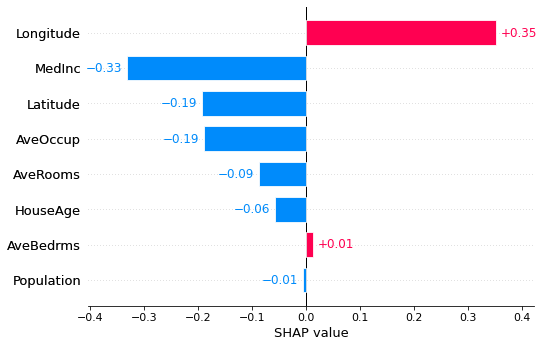

In [20]:
shap.plots.bar(shap_values[0])

#### If we take a look at the above figure, we can appreciate the individual contributions of the feature variables and in what direction they affect the target variable.
#### So for the first observation, the latitude contributes the most to the decrease in the house value.
#### On the contrary, the Longitude contributes the most to the increase in the house value.
#### Thus, by using this method, we can conclude that for this specific house, the location contributes the most to its value, with latitude contributing negatively and longitude contributing positively to the value. 

# 4. Conclusion

#### That brings us to the end of this notebook.

<div style="width:100%;text-align: center;"> <img align=middle src="https://images.unsplash.com/photo-1522292923399-bf8ddbd6e4e2?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mnx8ZW5kfGVufDB8fDB8fA%3D%3D&auto=format&fit=crop&w=500&q=60" alt="Heat beating" style="height:500px;margin-top:1rem;"> </div>

#### However, it doesn't need to be the end for you. 
#### There is so much more methods out there for you to explore.
#### I merely hope that I have intrigued you to investigate further and showed you first hand the importance of having to know how to interpret the beautiful models that we create.
#### I believe Machine Learning and Artificial Intelligence is not just about creating the most complex and impressive model that can predict and have almost psychic powers, but also being responsible for the models that we create and to be able to understand and intrepret how they arrived at a specific, problematic conclusion.
#### Furthermore, to also understand the model as a whole, globally, is one step further to make the model **truly** our own.

#### If you liked what you have read, do check out my other work and an upvote would be appreciated!
#### Hope to see you soon :)

# 5. Credit

* https://towardsdatascience.com/decrypting-your-machine-learning-model-using-lime-5adc035109b5
* https://analyticsindiamag.com/how-to-explain-ml-models-and-feature-importance-with-lime/
* https://towardsdatascience.com/lime-how-to-interpret-machine-learning-models-with-python-94b0e7e4432e
* https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137
* https://towardsdatascience.com/model-agnostic-methods-for-interpreting-any-machine-learning-model-4f10787ef504
* https://www.analyticsvidhya.com/blog/2020/03/6-python-libraries-interpret-machine-learning-models/